In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("SimTodActData.csv")
df = df.drop("Unnamed: 0", 1)
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})

In [3]:
df.head()

,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,running z,...,z fft std,x fft mean,y fft mean,z fft mean,x fft median,y fft median,z fft median,x fft mean weighted,y fft mean weighted,z fft mean weighted
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ...","[-9.5, -9.5, -9.5, -9.5, -9.3000000000000007, ...","[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.5, -3.5, -3.5, -3.5, -3.3999999999999999, ...","[10.136567466356647, 10.136567466356647, 10.13...",[ -4.695 -5.165 -5.635 -6.105 -6.575 -7.0...,[ 0.11 0.12 0.13 0.135 0.14 0.145 0....,[-1.715 -1.88 -2.045 -2.21 -2.375 -2.54 -2....,...,18.183767,14.424547,10.030523,10.026934,8.339191,3.946205,4.635212,7.995708,3.754116,4.522128
1,chris,climbing,"[[-8.5999999999999996, -0.90000000000000002, -...","[-8.5999999999999996, -8.5999999999999996, -8....","[-0.90000000000000002, -0.90000000000000002, -...","[-4.5999999999999996, -4.5999999999999996, -5....","[9.79438614717635, 9.79438614717635, 10.076705...",[-4.29 -4.725 -5.16 -5.585 -6.01 -6.435 -6....,[-0.525 -0.545 -0.565 -0.565 -0.565 -0.565 -0....,[ -2.54 -2.8 -3.06 -3.325 -3.59 -3.8...,...,42.783642,12.769028,17.365953,13.134259,4.822128,7.817556,5.262424,4.993605,7.702449,5.193446
2,chris,climbing,"[[-8.0999999999999996, -2.5, -5.59999999999999...","[-8.0999999999999996, -8.0999999999999996, -8....","[-2.5, -2.5, -2.5, -2.5, -2.5, -2.399999999999...","[-5.5999999999999996, -5.5999999999999996, -5....","[10.159724405711014, 10.159724405711014, 10.15...",[ -3.925 -4.315 -4.705 -5.095 -5.485 -5.8...,[ -1.22500000e+00 -1.39000000e+00 -1.5550000...,[-2.575 -2.82 -3.065 -3.31 -3.555 -3.8 -4....,...,58.031987,20.345512,19.971148,16.893184,9.945452,9.770645,7.605257,9.703963,9.432085,7.509308
3,chris,climbing,"[[-9.9000000000000004, 0.40000000000000002, -0...","[-9.9000000000000004, -9.9000000000000004, -9....","[0.40000000000000002, 0.40000000000000002, 0.4...","[-0.40000000000000002, -0.40000000000000002, -...","[9.916148445843275, 9.916148445843275, 9.91614...",[ -4.915 -5.405 -5.895 -6.385 -6.88 -7.3...,[ 0.235 0.26 0.285 0.31 0.335 0.36 0....,[-0.235 -0.26 -0.285 -0.31 -0.325 -0.34 -0....,...,12.903143,5.906535,9.010132,6.233557,3.221032,4.781873,2.636803,3.348520,4.579138,2.609051
4,chris,climbing,"[[-8.9000000000000004, -1.0, -1.3], [-8.900000...","[-8.9000000000000004, -8.9000000000000004, -8....","[-1.0, -1.0, -1.0, -1.0, -1.3, -1.3, -1.3, -1....","[-1.3, -1.3, -1.3, -1.3, -2.2999999999999998, ...","[9.049861877399014, 9.049861877399014, 9.04986...",[ -4.69 -5.175 -5.66 -6.145 -6.62 -7.0...,[ -5.75000000e-01 -6.25000000e-01 -6.7500000...,[-0.93 -1.025 -1.12 -1.215 -1.305 -1.395 -1....,...,46.967614,14.081287,18.323136,13.082804,5.647503,7.600385,4.727226,5.537722,7.508901,4.665374


In [4]:
Y = df['activity']
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 
            'y mean','z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x std', 'y std', 'z std',
            'xy mean', 'yz mean', 'xz mean', 'x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
            'z noise max', 'x noise std', 'y noise std', 'z noise std' , 'x fft min', 'y fft min', 'z fft min', 
            'x fft max', 'y fft max', 'z fft max', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft std', 'y fft std',
            'z fft std', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted']
X = df[features]
groups = df.subject.unique()

In [5]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





In [6]:
def grid(X_train,y_train,X_test,y_test):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [#[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
    #                                            'min_samples_leaf': [1, 5, 10, 15, 20],#     v
    #                                            'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    # models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

    # models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    #models.append([svm.SVC(kernel='rbf', class_weight={1:10,9:1}), {#'kernel': ['rbf'], # class_weight="balanced"; tol
                              # 'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    #models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])





    models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               }, "Random Forest"])

    models_with_best_params = []

    # cross-validation strategy
    cv = 10 # for 10-folds cross-validation

    # Leave One Group Out
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)


    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = 5)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        print(model[2], ": ")
        print("Best score for ", model[2], ":", clf.best_score_)
        print()
        print("Best parameters for ", model[2], " found on development set:", best_params)
#         print()
#         print("Best estimator for ", model[2], " model:", best_estimator)
        print()
#         print()

#         print("Grid scores on development set:")
#         print()
#         for params, mean_score, scores in clf.grid_scores_:
#             print("%0.3f (+/-%0.03f) for %r"
#                   % (mean_score, scores.std() * 2, params))
        print()

#     print(models_with_best_params)
    
    return best_params['n_estimators']

In [7]:
def run(pram, X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=pram)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: Random Forest')

    plt.show()
    
    return metrics.accuracy_score(expected,predicted)

9
chris
(63, 74)
(503, 74)
Random Forest : 
Best score for  Random Forest : 0.9206349206349206

Best parameters for  Random Forest  found on development set: {'n_estimators': 30}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.80000   0.80000   0.80000         5
    running    1.00000   0.27273   0.42857        11
    sitting    0.90000   0.75000   0.81818        12
   sleeping    1.00000   0.90909   0.95238        11
   standing    0.61111   0.91667   0.73333        12
    walking    0.52941   0.75000   0.62069        12

avg / total    0.80137   

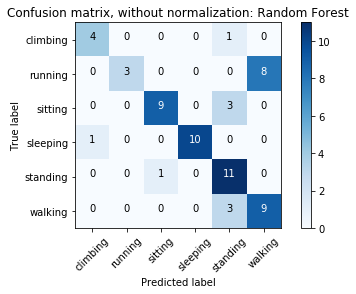

david
(61, 74)
(505, 74)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9344262295081968

Best parameters for  Random Forest  found on development set: {'n_estimators': 30}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.15385   1.00000   0.26667         2
    running    1.00000   1.00000   1.00000        11
    sitting    0.84615   0.91667   0.88000        12
   sleeping    1.00000   1.00000   1.00000        13
   standing    1.00000   0.75000   0.85714        12
    walking    1.00000   0.18182   0.30769        11

avg / total    0.94199   0.78689   0.79940        61

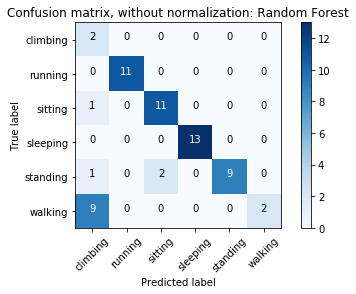

denee
(61, 74)
(505, 74)
Random Forest : 
Best score for  Random Forest : 0.9180327868852459

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    1.00000   0.60000   0.75000         5
    running    0.84615   1.00000   0.91667        11
    sitting    1.00000   0.27273   0.42857        11
   sleeping    1.00000   1.00000   1.00000        11
   standing    0.40000   0.33333   0.36364        12
    walking    0.42857   0.81818   0.56250        11

avg / total    0.75118   0.

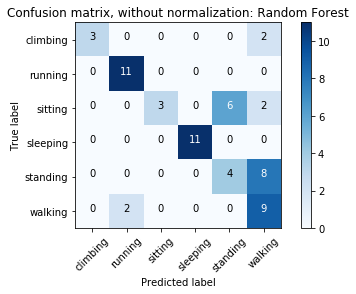

gia
(63, 74)
(503, 74)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9365079365079365

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.80000   1.00000   0.88889         4
    running    1.00000   1.00000   1.00000        12
    sitting    0.90000   0.75000   0.81818        12
   sleeping    1.00000   0.91667   0.95652        12
   standing    0.83333   0.83333   0.83333        12
    walking    0.84615   1.00000   0.91667        11

avg / total    0.90965   0.90476   0.90374        63

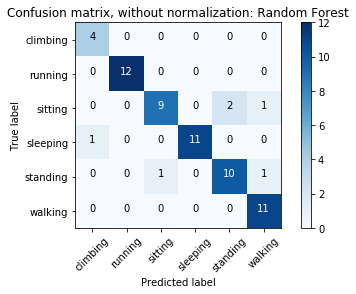

ilona
(62, 74)
(504, 74)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9838709677419355

Best parameters for  Random Forest  found on development set: {'n_estimators': 40}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.75000   1.00000   0.85714         3
    running    0.52174   1.00000   0.68571        12
    sitting    0.52632   0.83333   0.64516        12
   sleeping    1.00000   1.00000   1.00000        12
   standing    0.75000   0.25000   0.37500        12
    walking    0.00000   0.00000   0.00000        11

avg / total    0.57785   0.64516   0.56519        62

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


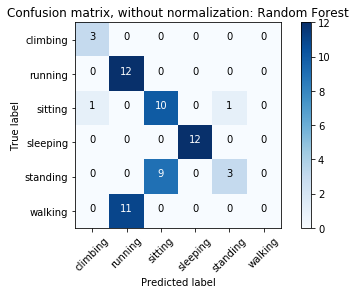

julia
(66, 74)
(500, 74)
Random Forest : 
Best score for  Random Forest : 0.9696969696969697

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    1.00000   1.00000   1.00000         5
    running    1.00000   0.16667   0.28571        12
    sitting    0.86667   1.00000   0.92857        13
   sleeping    1.00000   0.91667   0.95652        12
   standing    0.91667   0.91667   0.91667        12
    walking    0.52381   0.91667   0.66667        12

avg / total    0.87201   0.

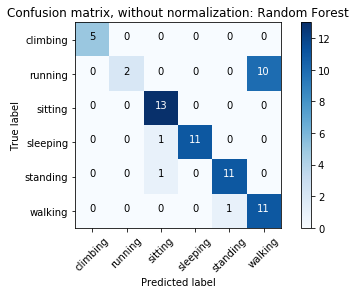

katie
(64, 74)
(502, 74)
Random Forest : 
Best score for  Random Forest : 0.953125

Best parameters for  Random Forest  found on development set: {'n_estimators': 20}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.83333   0.83333   0.83333         6
    running    1.00000   0.58333   0.73684        12
    sitting    0.28571   0.18182   0.22222        11
   sleeping    1.00000   0.69231   0.81818        13
   standing    0.50000   0.90909   0.64516        11
    walking    0.66667   0.90909   0.76923        11

avg / total    0.71838   0.67188   0.

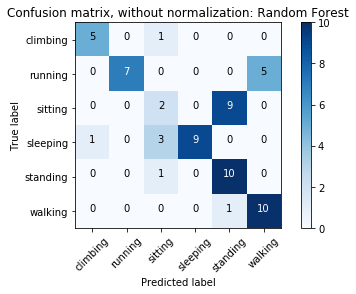

lili
(65, 74)
(501, 74)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9384615384615385

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.75000   0.75000   0.75000         4
    running    0.91667   1.00000   0.95652        11
    sitting    0.75000   0.75000   0.75000        12
   sleeping    1.00000   0.93333   0.96552        15
   standing    0.75000   0.75000   0.75000        12
    walking    0.90909   0.90909   0.90909        11

avg / total    0.86282   0.86154   0.86161        65

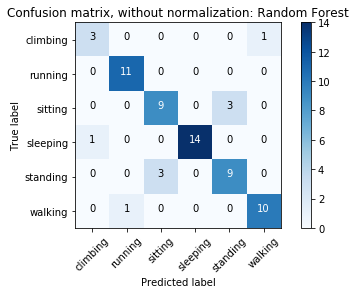

noel
(61, 74)
(505, 74)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9344262295081968

Best parameters for  Random Forest  found on development set: {'n_estimators': 30}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    1.00000   0.75000   0.85714         4
    running    1.00000   1.00000   1.00000        12
    sitting    0.52941   0.81818   0.64286        11
   sleeping    1.00000   1.00000   1.00000        12
   standing    0.75000   0.27273   0.40000        11
    walking    0.84615   1.00000   0.91667        11

avg / total    0.84232   0.81967   0.80301        61

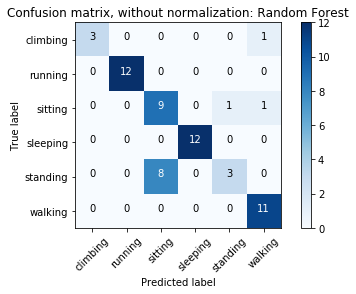

0.766134912711


In [8]:
a = []
print(len(groups))
for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    X_test = test[features]
    y_test = test['activity']
    print(test.shape)
    train = df.loc[(df.subject != g)]
    print(train.shape)
    X_train = train[features]
    y_train = train['activity']
    pram = grid(X_test,y_test,X_train,y_train)
    a.append(run(pram,X_train,y_train,X_test,y_test))
avg = np.array(a)
print(np.mean(avg))    
    
